# Regression Analysis using Linear Algebra and Numpy - Code Along 

## Introduction

In the previous sections, we have seen that in statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among data entities (variables). Linear regression is a highly important predictive analytical tool that most data scientists use in their routine analyses. Here we shall try to develop a basic intuition for regression from a linear algebra perspective using vectors and matrices operations, quite similar to what we saw in previous lessons and labs. This lesson covers least squares regression with matrix algebra without digging deep into the geometric dimensions. 
[You are advised to follow this link for a deeper mathematical and geometric understanding of the topic](http://math.mit.edu/~gs/linearalgebra/ila0403.pdf). Here we shall try to keep things in a more data oriented domain.


## Objectives

You will be able to: 

* Understand the role of linear algebra towards regression modeling
* Apply linear algebra to fit a function to data, describing linear mappings between input and output variables
* Develop simple linear algebraic models for simple and multivariate regression


## Regression Analysis

We know that the purpose of regression process is to fit a mathematical model to a set of observed points, in order to later use that model for predicting new values e.g. predicting sales, based on historical sales figures, predicting house prices based on different features of the house etc. 

Let's use a very simple toy example to understand how this works with linear algebra. Say we are collecting data on total number sales per day for some business. Imagine we have got three data points in the format: 

(day, total number of sales(in hundreds)) 

> (1, 1) , (2, 2) , (3, 2)

If we plot these points on a scatter plot with day (x-axis) vs. sales figures (y-axis), this is what we get:

```python
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3])
y = np.array([1,2,2])
               
plt.plot(x, y, 'o')
plt.xticks(x)

plt.show()
```

In [3]:
# Code here 
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
plt.plot(x, y, 'o')
plt.xticks(x)
plt.show();

<Figure size 640x480 with 1 Axes>

## Fitting a model to data - A quick refresher

The purpose of linear regression would be to fit a mathematical model (a straight line) in the parameter space  that best describes the relationship between day and sales. Simple linear regression attempts to fit a line (in a 2 dimensional space) to describe the relationship between data variables as shown in the example below:

<img src ="https://cdn-images-1.medium.com/max/1600/1*xxxqZtZExBJoxmYKIY-waw.png" width=400>


Following this, if we were to identify a relationship between the day and total number of sales, our goal would be to seek a function that describes this line, and allows us to linearly map input data points (day) or **independent variable** to outcome values (sales) or **dependent variable** . For this, we first assume that there is an underlying relationship that maps “days” uniquely to “number of sales”, that can be written in the function form as an equation of the straight line i.e. 


<center>
$$y = mx+c$$
</center>
where `c` is the intercept of the line and `m` denotes the slope, as shown below: 

<img src="https://www.kullabs.com/img/note_images/eA7pSlMa8FIftHQe.jpg" width =400>



We can write the fitting function based on above as sales being a **function** of days.

> ***sales = f (days)***


Or in more general terms 

> **y = C + DX** (from y = mx + c)

>(where **y** is the number of sales per day, **x** represents the day,  **C** (intercept) and **D** (slope) are the regression coefficients we are looking for hoping that these co-efficients will linearly map **day** to the **number of sales**)

So using this, we can show our three data points ((1, 1) , (2, 2) , (3, 2)) as:

> **C + 1(D) = 1**

> **C + 2(D) = 2**

> **C + 3(D) = 2**


We can see that our data points do not lie on a line. The first two points make a perfect linear system. When x = 1, y = 1; and when x = 2, y = 2 i.e. we can draw a straight line passing through these points. When x = 3, b = 2, we  know the three points do not lie on the same line as first two points, and our model will be an **approximation** i.e. 
> there would be some error between our line and the REAL relationship between these parameters. 

This behavior is can be simulated by using numpy's `polyfit()` function (similar to statsmodels ols) to draw a regression line to our data points as shown below. [Here is the documentation for np.polyfit()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html). 

```python
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit function to get m(intercept) and b(slope) . the degree parameter = 1 to show astraight line
b, m = polyfit(x, y, 1)

# Plot the data points and line calculated from ployfit
plt.plot(x, y, 'o')
plt.plot(x, b + (m * x), '-')
plt.xticks(x)

plt.show()
print (b,m)
```

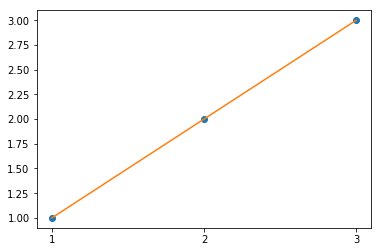

-3.845925372767128e-16 1.0000000000000004


In [5]:
# Code here 
from numpy.polynomial.polynomial import polyfit

b, m = polyfit(x, y, 1)

plt.plot(x, y, 'o')
plt.plot(x, b + (m * x), '-')

plt.xticks(x)
plt.show();
print(b, m)

The numbers we see reflect our slope (0.5) and intercept values (0.66). 

The line drawn above using this built in regression model clearly does not touch all the data points. Hence this would be considered an **APPROXIMATION** of the function we are trying to find. Now let's see how to achieve the same functionality with matrix algebra instead of polyfit function. 

## Create matrices and vectors

A linear system like above tells us that we are now in a linear algebra domain. And we should only have to deal with a few vectors and matrices in order to solve such problems. 

Recalling a linear systems from previous lessons, we have:

![](mat.png)



### Bias and Error terms

The extra column of ones in $A$ refers to the **bias** (or the intercept (c) from $mx+c$ shown above). If we don't include this constant value, then our function will have to go through the origin (0,0), which would seriously limit the types of relationships the model could describe. In machine learning, the size, or **weight**, of bias will be inferred by the learning algorithm. The 1s is just an arbitrary number that forms a basis for learning what the bias is going to be. (Visit the link at the bottom to learn more on this)

In above , we are hoping that there is some linear combination of the columns of A that gives us our vector of observed b values.

Unfortunately, we already know $b$ does not fit our model perfectly. That means it is outside the column space of A and we can't solve that equation for the vector $x$ directly. Every line we draw will have some value of **error** ***e*** associated with it. 

> **The goal is to choose the vector x for unknown variables to make *e* as small as possible**. 

## Ordinary least squares 

A common measure to find and minimize the value of this error is called *Ordinary Least Squares*. 

This says that our dependent variable, is composed of a linear part and error. The linear part is composed of an intercept, a and independent variable(s),along with their associated raw score regression weights.

In matrix terms, the same equation can be written:

> **y = X b + e **

This says to get y (sales), multiply each X by the appropriate vector b (unknowns),then add error term. We create a matrix X, which has an extra column of 1s in it for the intercept. For each day, the 1 is used to add the intercept in the first row of the column vector b.

Let's assume that error will equal zero on average and forget it to sketch a proof:

> **y = X b**

Now we want to solve for b, so we need to get rid of X. First we will make X into a nice square, symmetric matrix by emultiplying both sides of the equation by X<sup>T</sup>:

> **X<sup>T</sup> y = X<sup>T</sup> X b**

And now we have a square matrix that with any luck has an inverse, which we will call (X<sup>T</sup> X)<sup>-1</sup> . Multiply both sides by this inverse, and we have

> **(X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup>y = (X<sup>T</sup>X)<sup>-1</sup> (X<sup>T</sup> X b)**

It turns out that a matrix multiplied by its inverse is the identity matrix (A<sup>-1</sup>A=I):

> **(X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup> y = I b**

So if we solve for the b (called weights - or unknown variables), we find that

### b = (X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup> y 



Here, we shall focus here on the matrix and vector algebra perspective. With least squares regression, in order to solve for the expected value of weights, referred to as $\hat{x}$ (x-hat), we need to solve the above equation


Remember all above variables represent vectors. The elements of the vector x-hat are the estimated regression coefficients C and D we are looking for. They minimize the error between the model and the observed data in an elegant way that uses no calculus or complicated algebraic sums.

The above description can be summarized as:

*Using linear regression is just trying to solve **Xb = y**. But if any of the observed points deviate from the model, we cant find a direct solution. So we multiply both sides by the transpose of X. The transpose of X times X will always allow us to solve for unknown variables.*

## Calculate an OLS regression line

Let's use above formula to calculate a solution for our toy problem
```python
# Calculate the solution

X = np.array([[1,1],[1,2],[1,3]])
y = np.array([1,2,2])
Xt = X.T
XtX = Xt.dot(X)
XtX_inv = np.linalg.inv(XtX)
Xty = Xt.dot(y)
x_hat = XtX_inv.dot(Xty) # the value for b shown above
x_hat
```

In [17]:
# Code here 

So our solution gives us an intercept of 0.6 and slope value 0.5. Let's see what we get if we draw a line with these values with given data.

```python
# Define data points
x = np.array([1,2,3])
y = np.array([1,2,2])

# Plot the data points and line parameters calculated above
plt.plot(x, y, 'o')
plt.plot(x, x_hat[0] + (x_hat[1] * x), '-')
plt.xticks(x)

plt.show()
```

In [18]:
# Code here 

Success.. There we have it, an approximated line function. Just like the one we saw with polyfit, by using simple matrix algebra. 

## Regression with multiple variables

So above we saw how with simple regression we can draw a line on a 2d space to describe data relationships based on distribution of elements. If we perform similar function with multiple variables, we would have a parameter space that is not 2D. With 3 paramaters i.e. two input and one output feature, our fitting function would look like a plane as shown below:

![](http://www.clockbackward.com/wp-content/uploads/2009/06/points3DwPlane.png)

When we have more than one input variables, each data point can be seen as is a feature vector *xi*, composed of *x1 , x2 , …, xm* , where *m* is the total number of features (columns). For multiple regression, each data point should contain two or more features of the input. To represent all of the input data along with the vector of output values we set up a input matrix *X* and an output vector *y*. 

We can write this in general terms, as we saw earlier:
 
> **X β = y**


Where *X* are the input feature values, $\beta$ represents the co-efficients and *y* is the output (value to be predicted). In a simple least-squares linear regression model we seek a vector $\beta$ such that the product X$\beta$ most closely approximates the outcome vector y.

For each value of input features *xi*, we can compute a predicted outcome value  as:
![](https://www.saedsayad.com/images/MLR_1b.png)


The general formula to compute the beta vector, following the intuition from linear regression shown above, looks like:


### b = (X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup> y 

So we see that the general solution involves taking matrix transpose, inverse, dot multiplications  on the lines of solving a linear system of equations. 

In the next lab, we shall use a simple dataset and with above formulation for multivariate regression, we would try to fit a model to the data and see how well it performs. 



## Further Reading

You are strongly advised to visit the following links to develop a strong mathematical and geometrical intuition around how least squares work. These documents will provide you with visual , as well as an indepth mathematical formulation for above equations along with their proofs. 

* [Quora: Why do we need an extra column of ones in regression](https://www.quora.com/Why-do-we-add-an-extra-column-in-1-matrix-to-solve-normal-equation-in-linear-regression)

* [An excellent visual demonstration of oridnary least squares](http://setosa.io/ev/ordinary-least-squares-regression/)

* [Simple Regression in Matrix format](https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf)

## Summary

In this lesson, we had a gentle introduction to regression analysis and how we can use linear algebra to solve regression problems. We saw a toy example in the case of simple linear regression , relating days to number of sales and calculated a function that approximates the linear mapping. We also introduced the case of multiple input variables for the case of multiple regression and described it as matrix algebra. In th next lab, we shall use these equations to solve a real world problem. 